In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
cali = fetch_california_housing()

In [17]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
x = cali.data
y = cali.target

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [11]:
import numpy as np
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)

In [18]:
x.shape, y.shape

((20640, 8), (20640,))

In [26]:
tf.keras.backend.clear_session()

il = tf.keras.layers.Input(shape=(8,))
hl1 = Dense(256, activation='relu')(il)
hl2 = Dense(256, activation='relu')(hl1)
hl3 = Dense(256, activation='relu')(hl2)
ol = Dense(1, activation='linear')(hl3)
model = tf.keras.models.Model(inputs=il, outputs=ol)
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 134,145
Trainable params: 134,145
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                    min_delta=0,
                    patience=7,
                    verbose=1,
                    restore_best_weights=True)

In [44]:
history= model.fit(X_train,y_train, validation_data=(X_val, y_val),callbacks=[es], epochs=50, verbose=1)

Epoch 1/50
362/362 [==============================] - 2s 5ms/step - loss: 0.7480 - val_loss: 0.9761
Epoch 2/50
362/362 [==============================] - 2s 5ms/step - loss: 0.6867 - val_loss: 0.6896
Epoch 3/50
362/362 [==============================] - 3s 7ms/step - loss: 0.6581 - val_loss: 0.6387
Epoch 4/50
362/362 [==============================] - 2s 5ms/step - loss: 1.2952 - val_loss: 1.4133
Epoch 5/50
362/362 [==============================] - 2s 5ms/step - loss: 0.9302 - val_loss: 1.0874
Epoch 6/50
362/362 [==============================] - 2s 5ms/step - loss: 0.8008 - val_loss: 0.8819
Epoch 7/50
362/362 [==============================] - 2s 5ms/step - loss: 0.7375 - val_loss: 0.9097
Epoch 8/50
362/362 [==============================] - 2s 5ms/step - loss: 0.6953 - val_loss: 0.6879
Epoch 9/50
362/362 [==============================] - 2s 6ms/step - loss: 0.6665 - val_loss: 0.6776
Epoch 10/50
362/362 [==============================] - 3s 7ms/step - loss: 1.1294 - val_loss: 0.7586

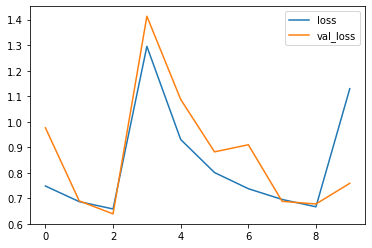

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [46]:
from sklearn.metrics import *
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

194/194 [==============================] - 0s 2ms/step
0.608719158451795
0.5805734459714249


In [47]:
model.evaluate(X_test, y_test)

194/194 [==============================] - 0s 2ms/step - loss: 0.6087


0.6087191104888916